<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_9_3_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SymPy

`SymPy` - это пакет для символьных вычислений на питоне, подобный системе *Mathematica*. Он работает с выражениями, содержащими символы.

In [ ]:
from sympy import *
init_printing()

Основными кирпичиками, из которых строятся выражения, являются символы. Символ имеет имя, которое используется при печати выражений. Объекты класса `Symbol` нужно создавать и присваивать переменным питона, чтобы их можно было использовать. В принципе, имя символа и имя переменной, которой мы присваиваем этот символ - две независимые вещи, и можно написать `abc=Symbol('xyz')`. Но тогда при вводе программы Вы будете использовать `abc`, а при печати результатов `SymPy` будет использовать `xyz`, что приведёт к ненужной путанице. Поэтому лучше, чтобы имя символа совпадало с именем переменной питона, которой он присваивается.

В языках, специально предназначенных для символьных вычислений, таких, как *Mathematica*, если Вы используете переменную, которой ничего не было присвоено, то она автоматически воспринимается как символ с тем же именем. Питон не был изначально предназначен для символьных вычислений. Если Вы используете переменную, которой ничего не было присвоено, Вы получите сообщение об ошибке. Объекты типа `Symbol` нужно создавать явно.

In [ ]:
x=Symbol('x')

In [ ]:
a=x**2-1
a

In [ ]:
type(a)

sympy.core.add.Add

Можно определить несколько символов одновременно. Строка разбивается на имена по пробелам.

In [ ]:
y,z=symbols('y z')

Подставим вместо $x$ выражение $y+1$.

In [ ]:
a.subs(x,y+1)

## Многочлены и рациональные функции

`SymPy` не раскрывает скобки автоматически. Для этого используется функция `expand`.

In [ ]:
a=(x+y-z)**6
a

In [ ]:
a=expand(a)
a

Степень многочлена $a$ по $x$.

In [ ]:
degree(a,x)

Соберём вместе члены с определёнными степенями $x$.

In [ ]:
collect(a,x)

Многочлен с целыми коэффициентами можно записать в виде произведения таких многочленов (причём каждый сомножитель уже невозможно расфакторизовать дальше, оставаясь в рамках многочленов с целыми коэффициентами). Существуют эффективные алгоритмы для решения этой задачи.

In [ ]:
a=factor(a)
a

`SymPy` не сокращает отношения многочленов на их наибольший общий делитель автоматически. Для этого используется функция `cancel`.

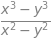

In [ ]:
a=(x**3-y**3)/(x**2-y**2)
a

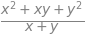

In [ ]:
cancel(a)

`SymPy` не приводит суммы рациональных выражений к общему знаменателю автоматически. Для этого используется функция `together`.

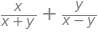

In [ ]:
a=y/(x-y)+x/(x+y)
a

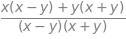

In [ ]:
together(a)

Функция `simplify` пытается переписать выражение *в наиболее простом виде*. Это понятие не имеет чёткого определения (в разных ситуациях *наиболее простыми* могут считаться разные формы выражения), и не существует алгоритма такого упрощения. Функция `symplify` работает эвристически, и невозможно заранее предугадать, какие упрощения она попытается сделать. Поэтому её удобно использовать в интерактивных сессиях, чтобы посмотреть, удастся ли ей записать выражение в каком-нибудь разумном виде, но нежелательно использовать в программах. В них лучше применять более специализированные функции, которые выполняют одно определённое преобразование выражения.

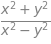

In [ ]:
simplify(a)

Разложение на элементарные дроби по отношению к $x$ и $y$.

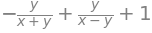

In [ ]:
apart(a,x)

In [ ]:
apart(a,y)

Подставим конкретные численные значения вместо переменных $x$ и $y$.

In [ ]:
a=a.subs({x:1,y:2})
a

А сколько это будет численно?

In [ ]:
a.n()

## Элементарные функции

`SymPy` автоматически применяет упрощения элементарных функция (которые справедливы во всех случаях).

In [ ]:
sin(-x)

In [ ]:
cos(pi/4),tan(5*pi/6)

`SymPy` может работать с числами с плавающей точкой, имеющими сколь угодно большую точность. Вот $\pi$ с 100 значащими цифрами.

In [ ]:
pi.n(100)

`E` - это основание натуральных логарифмов.

In [ ]:
log(1),log(E)

In [ ]:
exp(log(x)),log(exp(x))

А почему не $x$? Попробуйте подставить $x=2\pi i$.

In [ ]:
sqrt(0)

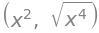

In [ ]:
sqrt(x)**4,sqrt(x**4)

А почему не $x^2$? Попробуйте подставить $x=i$.

Символы могут иметь некоторые свойства. Например, они могут быть положительными. Тогда `SymPy` может сильнее упростить квадратные корни.

In [ ]:
p,q=symbols('p q',positive=True)
sqrt(p**2)

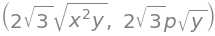

In [ ]:
sqrt(12*x**2*y),sqrt(12*p**2*y)

Пусть символ $n$ будет целым (`I` - это мнимая единица).

In [ ]:
n=Symbol('n',integer=True)
simplify(exp(2*pi*I*n))

In [ ]:
sin(pi*n)

Метод `rewrite` пытается переписать выражение в терминах заданной функции.

In [ ]:
cos(x).rewrite(exp),exp(I*x).rewrite(cos)

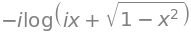

In [ ]:
asin(x).rewrite(log)

Функция `trigsimp` пытается переписать тригонометрическое выражение в *наиболее простом виде*. В программах лучше использовать более специализированные функции.

In [ ]:
trigsimp(2*sin(x)**2+3*cos(x)**2)

Функция `expand_trig` разлагает синусы и косинусы сумм и кратных углов.

In [ ]:
expand_trig(sin(x-y)),expand_trig(sin(2*x))

Чаще нужно обратное преобразование - произведений и степеней синусов и косинусов в выражения, линейные по этим функциям. Например, пусть мы работаем с отрезком ряда Фурье.

In [ ]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

Мы хотим возвести его в квадрат и опять получить отрезок ряда Фурье.

In [ ]:
a=(a**2).rewrite(exp).expand().rewrite(cos).expand()
a

In [ ]:
a.collect([cos(x),cos(2*x),cos(3*x),sin(x),sin(2*x),sin(3*x)])

Функция `expand_log` преобразует логарифмы произведений и степеней в суммы логарифмов (только для положительных величин); `logcombine` производит обратное преобразование.

In [ ]:
a=expand_log(log(p*q**2))
a

In [ ]:
logcombine(a)

Функция `expand_power_exp` переписывает степени, показатели которых - суммы, через произведения степеней.

In [ ]:
expand_power_exp(x**(p+q))

Функция `expand_power_base` переписывает степени, основания которых - произведения, через произведения степеней.

In [ ]:
expand_power_base((x*y)**n)

Функция `powsimp` выполняет обратные преобразования.

In [ ]:
powsimp(exp(x)*exp(2*y)),powsimp(x**n*y**n)

Можно вводить функции пользователя. Они могут иметь произвольное число аргументов.

In [ ]:
f=Function('f')
f(x)+f(x,y)

## Структура выражений

Внутреннее представление выражения - это дерево. Функция `srepr` возвращает строку, представляющую его.

In [ ]:
srepr(x+1)

"Add(Symbol('x'), Integer(1))"

In [ ]:
srepr(x-1)

"Add(Symbol('x'), Integer(-1))"

In [ ]:
srepr(x-y)

"Add(Symbol('x'), Mul(Integer(-1), Symbol('y')))"

In [ ]:
srepr(2*x*y/3)

"Mul(Rational(2, 3), Symbol('x'), Symbol('y'))"

In [ ]:
srepr(x/y)

"Mul(Symbol('x'), Pow(Symbol('y'), Integer(-1)))"

Вместо бинарных операций `+`, `*`, `**` и т.д. можно использовать функции `Add`, `Mul`, `Pow` и т.д.

In [ ]:
Mul(x,Pow(y,-1))==x/y

True

In [ ]:
srepr(f(x,y))

"Function('f')(Symbol('x'), Symbol('y'))"

Атрибут `func` - это функция верхнего уровня в выражении, а `args` - список её аргументов.

In [ ]:
a=2*x*y**2
a.func

sympy.core.mul.Mul

In [ ]:
a.args

In [ ]:
a.args[0]

In [ ]:
for i in a.args:
    print(i)

2
x
y**2


Функция `subs` заменяет переменную на выражение.

In [ ]:
a.subs(y,2)

Она можнет заменить несколько переменных. Для этого ей передаётся список кортежей или словарь.

In [ ]:
a.subs([(x,pi),(y,2)])

In [ ]:
a.subs({x:pi,y:2})

Она может заменить не переменную, а подвыражение - функцию с аргументами.

In [ ]:
a=f(x)+f(y)
a.subs(f(y),1)

In [ ]:
(2*x*y*z).subs(x*y,z)

In [ ]:
(x+x**2+x**3+x**4).subs(x**2,y)

Подстановки производятся последовательно. В данном случае сначала $x$ заменился на $y$, получилось $y^3+y^2$; потом в этом результате $y$ заменилось на $x$.

In [ ]:
a=x**2+y**3
a.subs([(x,y),(y,x)])

Если написать эти подстановки в другом порядке, результат будет другим.

In [ ]:
a.subs([(y,x),(x,y)])

Но можно передать функции `subs` ключевой параметр `simultaneous=True`, тогда подстановки будут производиться одновременно. Таким образом можно, например, поменять местами $x$ и $y$.

In [ ]:
a.subs([(x,y),(y,x)],simultaneous=True)

Можно заменить функцию на другую функцию.

In [ ]:
g=Function('g')
a=f(x)+f(y)
a.subs(f,g)

Метод `replace` ищет подвыражения, соответствующие образцу (содержащему произвольные переменные), и заменяет их на заданное выражение (оно может содержать те же произвольные переменные).

In [ ]:
a=Wild('a')
(f(x)+f(x+y)).replace(f(a),a**2)

In [ ]:
(f(x,x)+f(x,y)).replace(f(a,a),a**2)

In [ ]:
a=x**2+y**2
a.replace(x,x+1)

Соответствовать образцу должно целое подвыражение, это не может быть часть сомножителей в произведении или меньшая степеть в большей.

In [ ]:
a=2*x*y*z
a.replace(x*y,z)

In [ ]:
(x+x**2+x**3+x**4).replace(x**2,y)

## Решение уравнений

In [ ]:
a,b,c,d,e,f=symbols('a b c d e f')

Уравнение записывается как функция `Eq` с двумя параметрами. Функция `solve` возврящает список решений.

In [ ]:
solve(Eq(a*x,b),x)

Впрочем, можно передать функции `solve` просто выражение. Подразумевается уравнение, что это выражение равно 0.

In [ ]:
solve(a*x+b,x)

Квадратное уравнение имеет 2 решения.

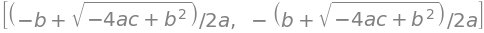

In [ ]:
solve(a*x**2+b*x+c,x)

Система линейных уравнений.

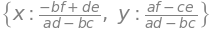

In [ ]:
solve([a*x+b*y-e,c*x+d*y-f],[x,y])

Функция `roots` возвращает корни многочлена с их множественностями.

In [ ]:
roots(x**3-3*x+2,x)

Функция `solve_poly_system` решает систему полиномиальных уравнений, строя их базис Грёбнера.

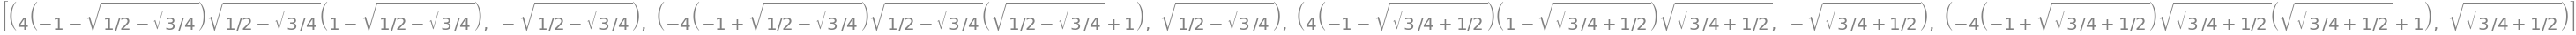

In [ ]:
p1=x**2+y**2-1
p2=4*x*y-1
solve_poly_system([p1,p2],x,y)

## Ряды

In [ ]:
exp(x).series(x,0,5)

Ряд может начинаться с отрицательной степени.

In [ ]:
cot(x).series(x,n=5)

И даже идти по полуцелым степеням.

In [ ]:
sqrt(x*(1-x)).series(x,n=5)

In [ ]:
log(gamma(1+x)).series(x,n=6).rewrite(zeta)

Подготовим 3 ряда.

In [ ]:
sinx=series(sin(x),x,0,8)
sinx

In [ ]:
cosx=series(cos(x),x,n=8)
cosx

In [ ]:
tanx=series(tan(x),x,n=8)
tanx

Произведения и частные рядов не вычисляются автоматически, к ним надо применить функцию `series`.

In [ ]:
series(tanx*cosx,n=8)

In [ ]:
series(sinx/cosx,n=8)

А этот ряд должен быть равен 1. Но поскольку `sinx` и `cosx` известны лишь с ограниченной точностью, мы получаем 1 с той же точностью.

In [ ]:
series(sinx**2+cosx**2,n=8)

Здесь первые члены сократились, и ответ можно получить лишь с меньшей точностью.

In [ ]:
series((1-cosx)/x**2,n=6)

Ряды можно дифференцировать и интегрировать.

In [ ]:
diff(sinx,x)

In [ ]:
integrate(cosx,x)

В ряд нельзя подставлять численное значение переменной разложения (а значит, нельзя и строить график). Для этого нужно сначала убрать $\mathcal{O}$ член, превратив отрезок ряда в многочлен.

In [ ]:
a=sinx.removeO()

In [ ]:
a.subs(x,0.1)

## Производные

In [ ]:
a=x*sin(x+y)
diff(a,x)

In [ ]:
diff(a,y)

Вторая производная по $x$ и первая по $y$.

In [ ]:
diff(a,x,2,y)

Функция `Derivative` представляет невычисленную производную. Её можно вычислить методом `doit`.

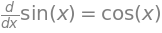

In [ ]:
a=Derivative(sin(x),x)
Eq(a,a.doit())

## Интегралы

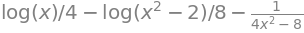

In [ ]:
integrate(1/(x*(x**2-2)**2),x)

In [ ]:
integrate(1/(exp(x)+1),x)

In [ ]:
integrate(log(x),x)

In [ ]:
integrate(x*sin(x),x)

In [ ]:
integrate(x*exp(-x**2),x)

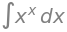

In [ ]:
a=integrate(x**x,x)
a

Получился невычисленный интеграл.

In [ ]:
print(a)

Integral(x**x, x)


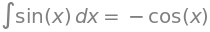

In [ ]:
a=Integral(sin(x),x)
Eq(a,a.doit())

Определённые интегралы.

In [ ]:
integrate(sin(x),(x,0,pi))

`oo` - это $\infty$.

In [ ]:
integrate(exp(-x**2),(x,0,oo))

In [ ]:
integrate(log(x)/(1-x),(x,0,1))

## Суммирование рядов

In [ ]:
summation(1/n**2,(n,1,oo))

In [ ]:
summation((-1)**n/n**2,(n,1,oo))

In [ ]:
summation(1/n**4,(n,1,oo))

Невычисленная сумма обозначается `Sum`.

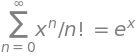

In [ ]:
a=Sum(x**n/factorial(n),(n,0,oo))
Eq(a,a.doit())

## Пределы

In [ ]:
limit((tan(sin(x))-sin(tan(x)))/x**7,x,0)

Ну это простой предел, считается разложением числителя и знаменателя в ряды. А вот если в $x=0$ существенно особая точка, дело сложнее. Посчитаем односторонние пределы.

In [ ]:
limit((tan(sin(x))-sin(tan(x)))/(x**7+exp(-1/x)),x,0,'+')

In [ ]:
limit((tan(sin(x))-sin(tan(x)))/(x**7+exp(-1/x)),x,0,'-')

## Дифференциальные уравнения

In [ ]:
t=Symbol('t')
x=Function('x')
p=Function('p')

Первого порядка.

In [ ]:
dsolve(diff(x(t),t)+x(t),x(t))

Второго порядка.

In [ ]:
dsolve(diff(x(t),t,2)+x(t),x(t))

Система уравнений первого порядка.

In [ ]:
dsolve((diff(x(t),t)-p(t),diff(p(t),t)+x(t)))

## Линейная алгебра

In [ ]:
a,b,c,d,e,f=symbols('a b c d e f')

Матрицу можно построить из списка списков.

In [ ]:
M=Matrix([[a,b,c],[d,e,f]])
M

⎡a  b  c⎤
⎢       ⎥
⎣d  e  f⎦

In [ ]:
M.shape

Матрица-строка.

In [ ]:
Matrix([[1,2,3]])

[1  2  3]

Матрица-столбец.

In [ ]:
Matrix([1,2,3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Можно построить матрицу из функции.

In [ ]:
def g(i,j):
    return Rational(1,i+j+1)
Matrix(3,3,g)

⎡ 1   1/2  1/3⎤
⎢             ⎥
⎢1/2  1/3  1/4⎥
⎢             ⎥
⎣1/3  1/4  1/5⎦

Или из неопределённой функции.

In [ ]:
g=Function('g')
M=Matrix(3,3,g)
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)  g(1, 2)⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [ ]:
M[1,2]

In [ ]:
M[1,2]=0
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)     0   ⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [ ]:
M[2,:]

[g(2, 0)  g(2, 1)  g(2, 2)]

In [ ]:
M[:,1]

⎡g(0, 1)⎤
⎢       ⎥
⎢g(1, 1)⎥
⎢       ⎥
⎣g(2, 1)⎦

In [ ]:
M[0:2,1:3]

⎡g(0, 1)  g(0, 2)⎤
⎢                ⎥
⎣g(1, 1)     0   ⎦

Единичная матрица.

In [ ]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Матрица из нулей.

In [ ]:
zeros(3)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [ ]:
zeros(2,3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

Диагональная матрица.

In [ ]:
diag(1,2,3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [ ]:
M=Matrix([[a,1],[0,a]])
diag(1,M,2)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  a  1  0⎥
⎢          ⎥
⎢0  0  a  0⎥
⎢          ⎥
⎣0  0  0  2⎦

Операции с матрицами.

In [ ]:
A=Matrix([[a,b],[c,d]])
B=Matrix([[1,2],[3,4]])
A+B

⎡a + 1  b + 2⎤
⎢            ⎥
⎣c + 3  d + 4⎦

In [ ]:
A*B,B*A

⎛⎡a + 3⋅b  2⋅a + 4⋅b⎤  ⎡ a + 2⋅c    b + 2⋅d ⎤⎞
⎜⎢                  ⎥, ⎢                    ⎥⎟
⎝⎣c + 3⋅d  2⋅c + 4⋅d⎦  ⎣3⋅a + 4⋅c  3⋅b + 4⋅d⎦⎠

In [ ]:
A*B-B*A

⎡   3⋅b - 2⋅c      2⋅a + 3⋅b - 2⋅d⎤
⎢                                 ⎥
⎣-3⋅a - 3⋅c + 3⋅d    -3⋅b + 2⋅c   ⎦

In [ ]:
simplify(A**(-1))

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

In [ ]:
det(A)

### Собственные значения и векторы

In [ ]:
x=Symbol('x',real=True)

In [ ]:
M=Matrix([[(1-x)**3*(3+x),4*x*(1-x**2),-2*(1-x**2)*(3-x)],
          [4*x*(1-x**2),-(1+x)**3*(3-x),2*(1-x**2)*(3+x)],
          [-2*(1-x**2)*(3-x),2*(1-x**2)*(3+x),16*x]])
M

⎡        3                  ⎛     2⎞             ⎛   2    ⎞⎤
⎢ (1 - x) ⋅(x + 3)      4⋅x⋅⎝1 - x ⎠     (3 - x)⋅⎝2⋅x  - 2⎠⎥
⎢                                                          ⎥
⎢       ⎛     2⎞                     3   ⎛       2⎞        ⎥
⎢   4⋅x⋅⎝1 - x ⎠     -(3 - x)⋅(x + 1)    ⎝2 - 2⋅x ⎠⋅(x + 3)⎥
⎢                                                          ⎥
⎢        ⎛   2    ⎞  ⎛       2⎞                            ⎥
⎣(3 - x)⋅⎝2⋅x  - 2⎠  ⎝2 - 2⋅x ⎠⋅(x + 3)         16⋅x       ⎦

In [ ]:
det(M)

Значит, у этой матрицы есть нулевое подпространство (она обращает векторы из этого подпространства в 0). Базис этого подпространства.

In [ ]:
v=M.nullspace()
len(v)

Оно одномерно.

In [ ]:
v=simplify(v[0])
v

⎡ -2  ⎤
⎢─────⎥
⎢x - 1⎥
⎢     ⎥
⎢  2  ⎥
⎢─────⎥
⎢x + 1⎥
⎢     ⎥
⎣  1  ⎦

Проверим.

In [ ]:
simplify(M*v)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Собственные значения и их кратности.

In [ ]:
M.eigenvals()

Если нужны не только собственные значения, но и собственные векторы, то нужно использовать метод `eigenvects`. Он возвращает список кортежей. В каждом из них нулевой элемент - собственное значение, первый - его кратность, и последний - список собственных векторов, образующих базис (их столько, какова кратность).

In [ ]:
v=M.eigenvects()
len(v)

In [ ]:
for i in range(len(v)):
    v[i][2][0]=simplify(v[i][2][0])
v

⎡⎛      ⎡⎡ -2  ⎤⎤⎞  ⎛               ⎡⎡x   1⎤⎤⎞  ⎛              ⎡⎡x - 1⎤⎤⎞⎤
⎢⎜      ⎢⎢─────⎥⎥⎟  ⎜               ⎢⎢─ + ─⎥⎥⎟  ⎜              ⎢⎢─────⎥⎥⎟⎥
⎢⎜      ⎢⎢x - 1⎥⎥⎟  ⎜         2     ⎢⎢2   2⎥⎥⎟  ⎜        2     ⎢⎢x + 1⎥⎥⎟⎥
⎢⎜      ⎢⎢     ⎥⎥⎟  ⎜ ⎛ 2    ⎞      ⎢⎢     ⎥⎥⎟  ⎜⎛ 2    ⎞      ⎢⎢     ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢  2  ⎥⎥⎟, ⎜-⎝x  + 3⎠ , 1, ⎢⎢x + 1⎥⎥⎟, ⎜⎝x  + 3⎠ , 1, ⎢⎢1   x⎥⎥⎟⎥
⎢⎜      ⎢⎢─────⎥⎥⎟  ⎜               ⎢⎢─────⎥⎥⎟  ⎜              ⎢⎢─ - ─⎥⎥⎟⎥
⎢⎜      ⎢⎢x + 1⎥⎥⎟  ⎜               ⎢⎢x - 1⎥⎥⎟  ⎜              ⎢⎢2   2⎥⎥⎟⎥
⎢⎜      ⎢⎢     ⎥⎥⎟  ⎜               ⎢⎢     ⎥⎥⎟  ⎜              ⎢⎢     ⎥⎥⎟⎥
⎣⎝      ⎣⎣  1  ⎦⎦⎠  ⎝               ⎣⎣  1  ⎦⎦⎠  ⎝              ⎣⎣  1  ⎦⎦⎠⎦

Проверим.

In [ ]:
for i in range(len(v)):
    z=M*v[i][2][0]-v[i][0]*v[i][2][0]
    pprint(simplify(z))

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


### Жорданова нормальная форма

In [ ]:
M=Matrix([[Rational(13,9),-Rational(2,9),Rational(1,3),Rational(4,9),Rational(2,3)],
          [-Rational(2,9),Rational(10,9),Rational(2,15),-Rational(2,9),-Rational(11,15)],
          [Rational(1,5),-Rational(2,5),Rational(41,25),-Rational(2,5),Rational(12,25)],
          [Rational(4,9),-Rational(2,9),Rational(14,15),Rational(13,9),-Rational(2,15)],
          [-Rational(4,15),Rational(8,15),Rational(12,25),Rational(8,15),Rational(34,25)]])
M

⎡13/9   -2/9  1/3   4/9    2/3 ⎤
⎢                              ⎥
⎢                         -11  ⎥
⎢-2/9   10/9  2/15  -2/9  ──── ⎥
⎢                          15  ⎥
⎢                              ⎥
⎢              41          12  ⎥
⎢ 1/5   -2/5   ──   -2/5   ──  ⎥
⎢              25          25  ⎥
⎢                              ⎥
⎢              14              ⎥
⎢ 4/9   -2/9   ──   13/9  -2/15⎥
⎢              15              ⎥
⎢                              ⎥
⎢              12          34  ⎥
⎢-4/15  8/15   ──   8/15   ──  ⎥
⎣              25          25  ⎦

Метод `M.jordan_form()` возвращает пару матриц, матрицу преобразования $P$ и собственно жорданову форму $J$: $M = P J P^{-1}$.

In [ ]:
P,J=M.jordan_form()
J

⎡1  0  0    0      0  ⎤
⎢                     ⎥
⎢0  2  1    0      0  ⎥
⎢                     ⎥
⎢0  0  2    0      0  ⎥
⎢                     ⎥
⎢0  0  0  1 - ⅈ    0  ⎥
⎢                     ⎥
⎣0  0  0    0    1 + ⅈ⎦

In [ ]:
P=simplify(P)
P

⎡                5⋅ⅈ   -5⋅ⅈ ⎤
⎢-2  10/9   0    ───   ─────⎥
⎢                 12     12 ⎥
⎢                           ⎥
⎢               -5⋅ⅈ    5⋅ⅈ ⎥
⎢-2  -5/9   0   ─────   ─── ⎥
⎢                 6      6  ⎥
⎢                           ⎥
⎢0    0    4/3  -3/4   -3/4 ⎥
⎢                           ⎥
⎢               -5⋅ⅈ    5⋅ⅈ ⎥
⎢1   10/9   0   ─────   ─── ⎥
⎢                 6      6  ⎥
⎢                           ⎥
⎣0    0     1     1      1  ⎦

Проверим.

In [ ]:
Z=P*J*P**(-1)-M
simplify(Z)

⎡0  0  0  0  0⎤
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎣0  0  0  0  0⎦

## Графики

`SymPy` использует `matplotlib`. Однако он распределяет точки по $x$ адаптивно, а не равномерно.

In [ ]:
%matplotlib inline

Одна функция.

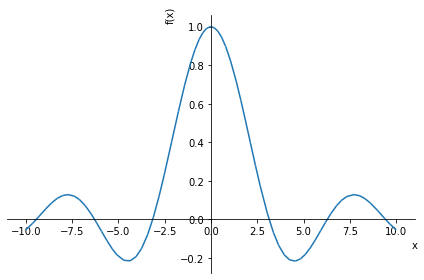

In [ ]:
plot(sin(x)/x,(x,-10,10))

Несколько функций.

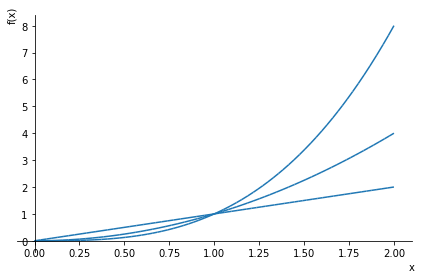

In [ ]:
plot(x,x**2,x**3,(x,0,2))

Другие функции надо импортировать из пакета `sympy.plotting`.

In [ ]:
from sympy.plotting import (plot_parametric,plot_implicit,
                            plot3d,plot3d_parametric_line,
                            plot3d_parametric_surface)

Параметрический график - фигура Лиссажу.

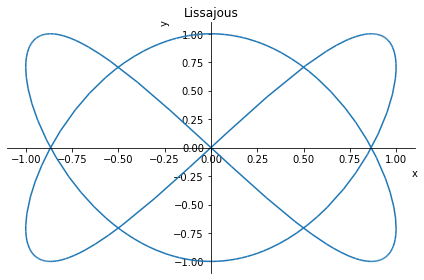

In [ ]:
t=Symbol('t')
plot_parametric(sin(2*t),cos(3*t),(t,0,2*pi),
                title='Lissajous',xlabel='x',ylabel='y')

Неявный график - окружность.

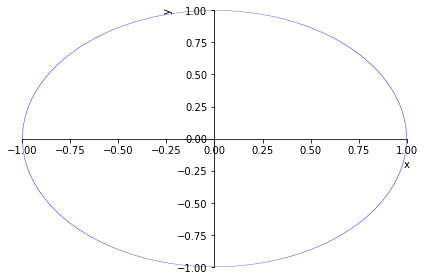

In [ ]:
plot_implicit(x**2+y**2-1,(x,-1,1),(y,-1,1))

Поверхность. Если она строится не `inline`, а в отдельном окне, то её можно вертеть мышкой.

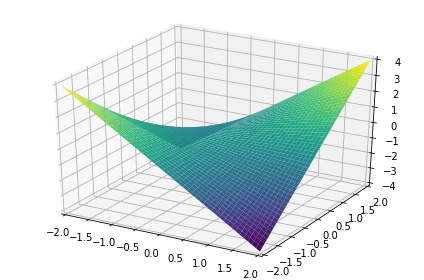

In [ ]:
plot3d(x*y,(x,-2,2),(y,-2,2))

Несколько поверхностей.

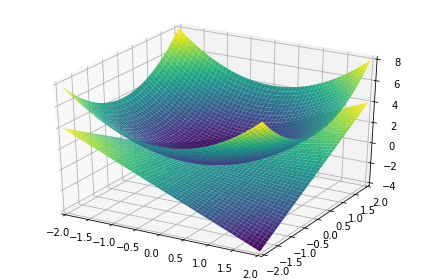

In [ ]:
plot3d(x**2+y**2,x*y,(x,-2,2),(y,-2,2))

Параметрическая пространственная линия - спираль.

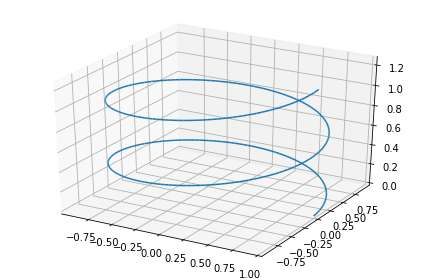

In [ ]:
a=0.1
plot3d_parametric_line(cos(t),sin(t),a*t,(t,0,4*pi))

Параметрическая поверхность - тор.

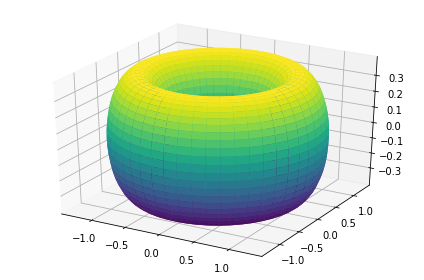

In [ ]:
u,v=symbols('u v')
a=0.4
plot3d_parametric_surface((1+a*cos(u))*cos(v),
                          (1+a*cos(u))*sin(v),a*sin(u),
                          (u,0,2*pi),(v,0,2*pi))